# Plot Evaluation Results

In [1]:
!pip install pandas matplotlib seaborn

In [ ]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams.update({
    "font.family": "Palatino",   
})

In [ ]:
# df = pd.DataFrame(columns=["filename", "optimization_type", "line_reduction"])

# for optimization_type in ["tdce", "lvn", "combined"]:

#     bril_files = glob.glob(f"./{optimization_type}/*.bril")

#     for bril_file in bril_files:
#         bril_name = bril_file.split("/")[-1]

#         with open(bril_file, "r") as f:
#             bril_lines = f.readlines()
#         # df.loc[len(df)] = [bril_name, len(bril_lines), False]

#         out_file = bril_file.replace(".bril", ".out")
#         with open(out_file, "r") as f:
#             out_lines = f.readlines()
#         # df.loc[len(df)] = [bril_name, len(out_lines), True]

#         df.loc[len(df)] = [bril_name, optimization_type, len(bril_lines) - len(out_lines)]


In [11]:
# read csv
df = pd.read_csv("results.csv")

In [ ]:
# df.to_csv("results.csv")
# df

,filename,optimization_type,line_reduction


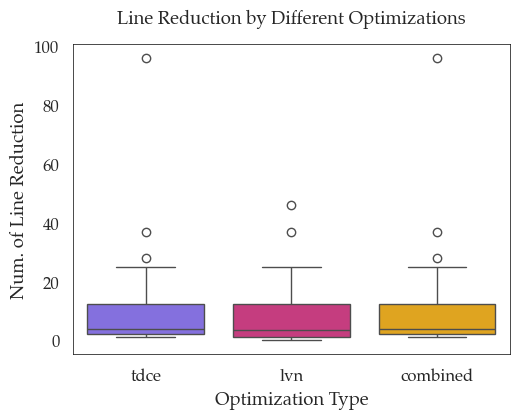

In [44]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(5, 4))

palette = {
    "tdce": "#785ef0",   # blue
    "lvn":  "#dc267f",   # orange
    "combined":  "#ffb000",   # green
}

sns.set_theme(color_codes=True, font_scale=1.1)
mpl.rcParams.update({
    "font.family": "Palatino",   
})

t = df.copy()
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]

plt.title("Line Reduction by Different Optimizations", pad=15)
ax = sns.boxplot(data=t, x="Optimization Type", y="Num. of Line Reduction", hue="Optimization Type", palette=palette)
fig = plt.gcf()

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(0.5)
plt.tight_layout(pad=0)
ax = plt.gca()
ax.set_facecolor('white')
plt.grid(axis="y", linestyle="--")
plt.gcf().set_facecolor('white')

In [59]:
# Group by optimization type
grouped = t.groupby("Optimization Type")["Num. of Line Reduction"]

# Compute summary stats
stats = grouped.describe()

# Compute quartiles and IQR
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ["Q1", "Median", "Q3"]
quartiles["IQR"] = quartiles["Q3"] - quartiles["Q1"]

# Compute whiskers (Tukey definition: 1.5 * IQR from Q1/Q3)
def whiskers(x):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = (x[x >= q1 - 1.5*iqr]).min()
    upper = (x[x <= q3 + 1.5*iqr]).max()
    return pd.Series({"Lower whisker": lower, "Upper whisker": upper})

whisk = grouped.apply(whiskers)

# Merge everything into one table
summary = stats.join(quartiles).join(whisk)

print(summary.round(2))

                                 count  mean    std  min  25%  50%    75%  \
Optimization Type                                                           
combined          Lower whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
                  Upper whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
lvn               Lower whisker   68.0  7.87   9.35  0.0  1.0  3.5  12.25   
                  Upper whisker   68.0  7.87   9.35  0.0  1.0  3.5  12.25   
tdce              Lower whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   
                  Upper whisker   68.0  9.15  13.36  1.0  2.0  4.0  12.25   

                                  max   Q1  Median     Q3    IQR  \
Optimization Type                                                  
combined          Lower whisker  96.0  2.0     4.0  12.25  10.25   
                  Upper whisker  96.0  2.0     4.0  12.25  10.25   
lvn               Lower whisker  46.0  1.0     3.5  12.25  11.25   
                  Upper whisker  46.0  1.0 

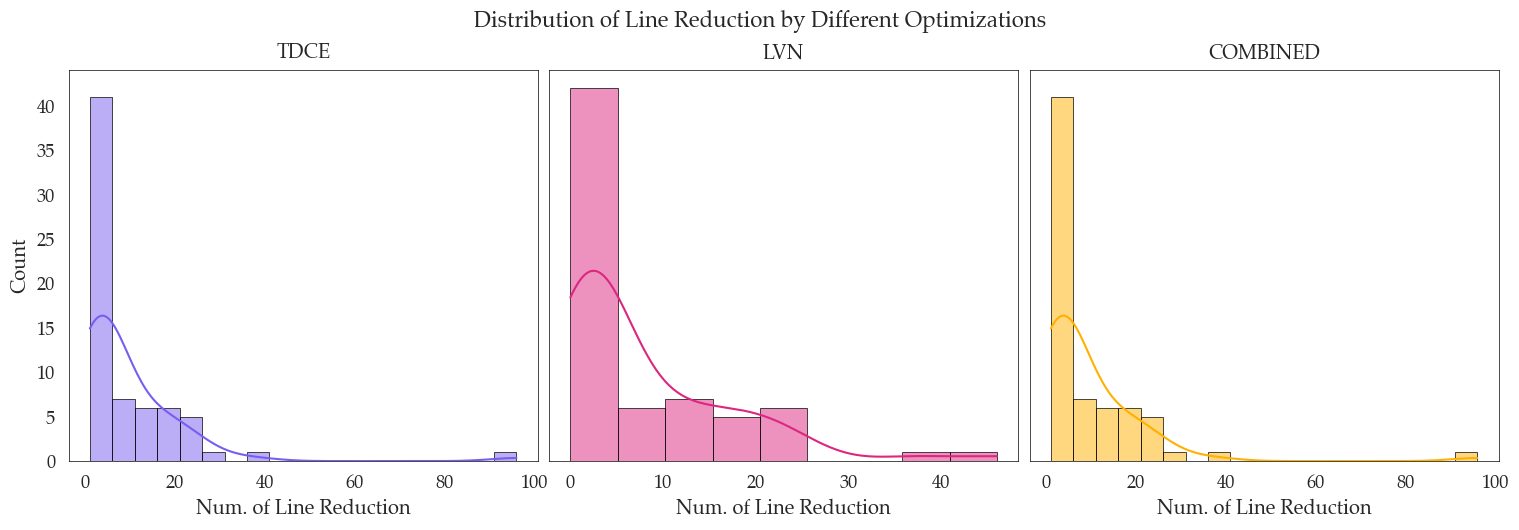

In [81]:
palette = {"tdce":"#785ef0", "lvn":"#dc267f", "combined":"#ffb000"}

sns.set_theme(color_codes=True, font_scale=1.2)
mpl.rcParams.update({"font.family": "Palatino"})

opts = ["tdce", "lvn", "combined"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, opt in zip(axes, opts):
    t = df[df["optimization_type"] == opt]
    # plot (no hue needed; it's a single series)
    sns.histplot(
        data=t, x="line_reduction", kde=True,
        color=palette[opt], edgecolor="black", linewidth=0.5, ax=ax
    )
    ax.set_title(opt.upper(), pad=8)
    ax.set_xlabel("Num. of Line Reduction")
    if ax is axes[0]:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")

    # per-axes styling
    ax.set_facecolor("white")
    for sp in ax.spines.values():
        sp.set_visible(True)
        sp.set_color("black")
        sp.set_linewidth(0.5)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# figure styling
fig.patch.set_facecolor("white")

# title
fig.suptitle("Distribution of Line Reduction by Different Optimizations", fontsize=16, y=1.02)
fig.tight_layout(pad=0)
plt.show()

/var/folders/9r/5bxsj6jx5fddfkj0hvq72kym0000gn/T/ipykernel_47508/3639933506.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center", va="top")


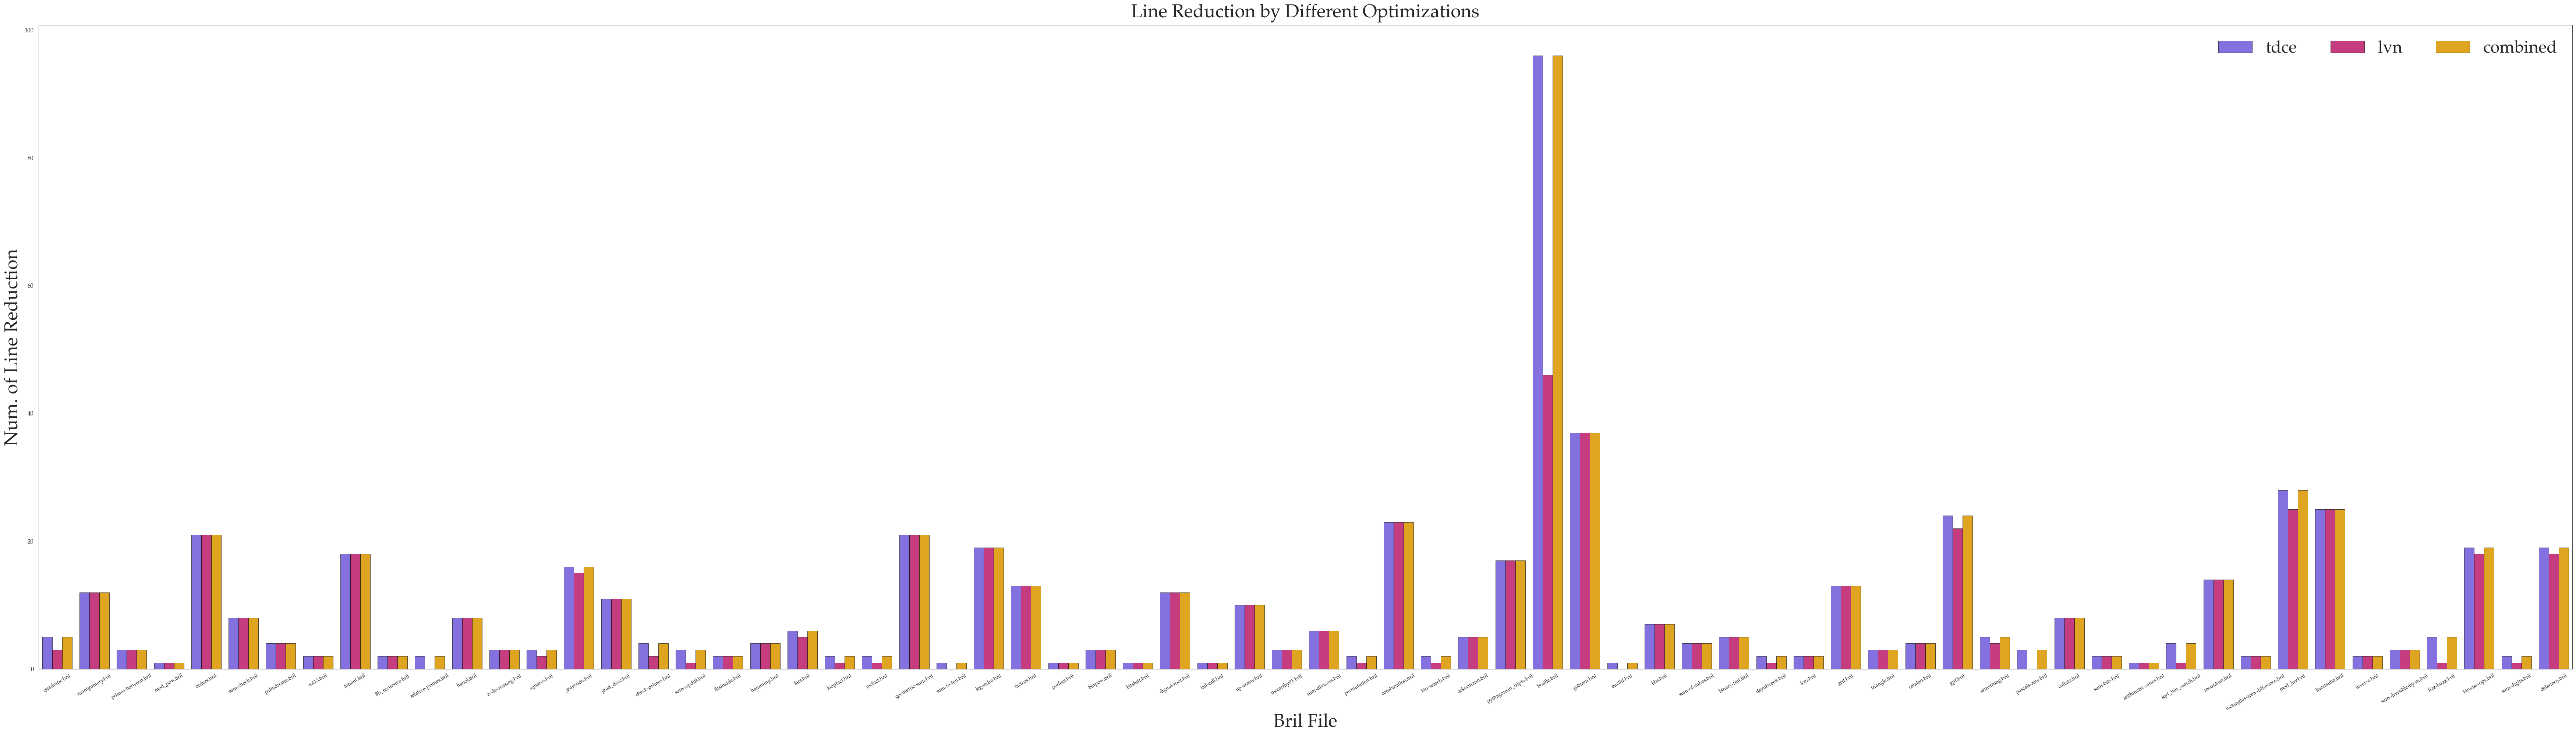

In [91]:
# --- figure & theme ---
fig, ax = plt.subplots(figsize=(70, 20))
sns.set_theme(color_codes=True, font_scale=3, rc={"font.family": "Palatino"})

palette = {
    "tdce": "#785ef0",   # blue
    "lvn":  "#dc267f",   # orange
    "combined":  "#ffb000",   # green
}

# --- tidy data ---
t = df.copy()
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]

# --- plot ---
ax = sns.barplot(
    data=t,
    x="Bril File",
    y="Num. of Line Reduction",
    hue="Optimization Type",
    palette=palette,
    errorbar=None,                 # no CI whiskers
    edgecolor="black",
    linewidth=0.5
)

# --- labels & legend ---
ax.set_title("Line Reduction by Different Optimizations", pad=15)
ax.set_xlabel("Bril File")
ax.set_ylabel("Num. of Line Reduction")
ax.legend(title=None, frameon=False, ncols=3, loc="upper right")

# --- style: white bg, dashed grid, black spines ---
ax.set_facecolor("white")
fig.set_facecolor("white")
for sp in ax.spines.values():
    sp.set_visible(True)
    sp.set_color("black")
    sp.set_linewidth(0.5)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# --- x labels: rotate and tighten ---
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center", va="top")
ax.tick_params(axis="x", labelsize=10, pad=2)
ax.tick_params(axis="y", labelsize=12)

plt.tight_layout(pad=0.2)
plt.show()

Win share (ties split) — apples-to-apples only:
                   wins_split  percent
optimization_type                     
tdce                    26.67     39.2
lvn                     14.67     21.6
combined                26.67     39.2


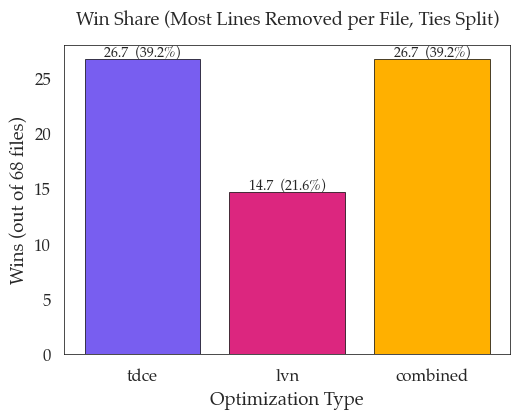

In [78]:
# ---------- style ----------
palette = {"tdce":"#785ef0", "lvn":"#dc267f", "combined":"#ffb000"}
order = ["tdce", "lvn", "combined"]

sns.set_theme(color_codes=True, font_scale=1.1)
mpl.rcParams.update({"font.family": "Palatino"})

# ---------- per-file table ----------
pivot = df.pivot_table(index="filename",
                       columns="optimization_type",
                       values="line_reduction",
                       aggfunc="max")

# Apples-to-apples: keep files that have ALL methods present
pivot_complete = pivot.dropna(subset=order)

# Split ties evenly among winners
winners_mask = pivot_complete.eq(pivot_complete.max(axis=1), axis=0)
shares = winners_mask.div(winners_mask.sum(axis=1), axis=0)   # each row sums to 1

win_counts = shares.sum()                      # how many "wins" (ties split)
total_files = len(pivot_complete)
win_pct = (win_counts / total_files * 100).round(1)

win_table = pd.DataFrame({
    "wins_split": win_counts.round(2),
    "percent": win_pct
}).loc[order]

print("Win share (ties split) — apples-to-apples only:")
print(win_table)

# ---------- bar chart ----------
plt.figure(figsize=(5, 4))
bars = plt.bar(
    win_table.index,
    win_table["wins_split"].values,
    color=[palette[k] for k in win_table.index],
    edgecolor="black", linewidth=0.5
)

plt.title("Win Share (Most Lines Removed per File, Ties Split)", pad=15)
plt.ylabel(f"Wins (out of {total_files} files)")
plt.xlabel("Optimization Type")

# annotate counts and %
for b, pct in zip(bars, win_table["percent"].values):
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y + 0,
             f"{y:.1f}  ({pct}%)",
             ha="center", va="bottom", fontsize=10)

ax = plt.gca()
ax.set_facecolor("white")
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(0.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

fig = plt.gcf()
fig.set_facecolor("white")

plt.tight_layout(pad=0)
plt.show()